Please enter the path of you csv file:/home/skont/Desktop/pq_nomad.csv


<IPython.core.display.Javascript object>


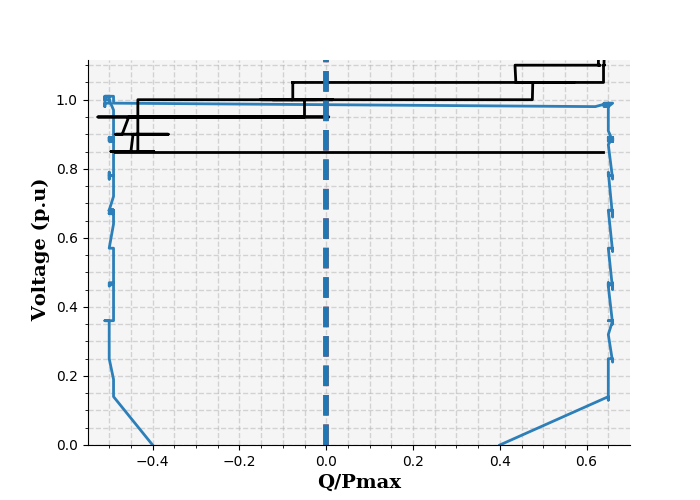

Text(0.5, 0, 'Q/Pmax')

In [2]:
from plot_maplot_v1 import *
import numpy as np
%matplotlib notebook
csv=input("Please enter the path of you csv file:")
data = get_data_from_csv(csv)

p=[data['ppc:P0_Scaled'][i] for i in reversed(range(414))]
p=p+data['ppc:P0_Scaled'][414:].tolist()
q=[data['ppc:Q0_Scaled'][i] for i in reversed(range(414))]
q=q+data['ppc:Q0_Scaled'][414:].tolist()
p.append(0)
q.append(-0.4)
p= [0]+p
q=[0.4]+q
fig, ax = plt.subplots(figsize=(7,5))
l1 = ax.plot(q,p,label='V(Q)',linewidth=2,c='#2c7fb8')
ax.axvline(linewidth=4, ls='--',c='#de2d26')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_facecolor('#000000')
ax.grid(which='both',ls='--',lw=1,alpha=0.5)
ax.set_ylim(0,1.115)
ax.set_xlim(-0.55,0.7)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.set_ylabel('Active Power (p.u)',fontdict=font)
ax.set_xlabel('Q/Pmax',fontdict=font)


In [1]:
from plot_maplot_v1 import *
import numpy as np

csv=input("Please enter the path of you csv file:")
data = get_data_from_csv(csv)

Please enter the path of you csv file:/home/skont/Desktop/qv_nomad.csv


In [6]:
data

,ppc:Q0,avr:VSP0,ppc:Q0_Scaled,avr:VSP0_Scaled
0,12569.938,39675,0.628,1.15
1,12569.938,39675,0.628,1.15
2,12581.377,39675,0.629,1.15
3,12552.782,39675,0.628,1.15
4,12581.377,39675,0.629,1.15
...,...,...,...,...
986,-8440.960,29325,-0.422,0.85
987,-8784.089,29325,-0.439,0.85
988,-8692.588,29325,-0.435,0.85
989,-8681.149,29325,-0.434,0.85


<IPython.core.display.Javascript object>


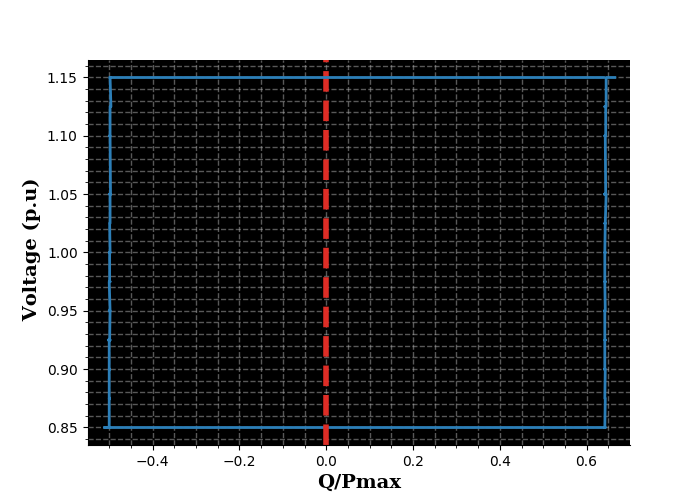

In [7]:
%matplotlib notebook
# fig, ax = plt.subplots(figsize=(5,5))
fig, ax = plt.subplots(figsize=(7,5))
l1 = ax.plot(data['ppc:Q0_Scaled'],data['avr:VSP0_Scaled'],label='V(Q)',linewidth=2,c='#2c7fb8')
ax.axvline(linewidth=4, ls='--',c='#de2d26')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_facecolor('#000000')
ax.grid(which='both',ls='--',lw=1,alpha=0.5)
# ax.set_ylim(0,1.115)
ax.set_xlim(-0.55,0.7)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.set_ylabel(' Voltage (p.u)',fontdict=font)
ax.set_xlabel('Q/Pmax',fontdict=font)
ax.axhline(y=1.15,xmin=0.045,xmax=0.95,linewidth=2, ls='-',c='#2c7fb8')

In [1]:
from plot_maplot_v1 import *
import numpy as np
%matplotlib notebook
csv=input("Please enter the path of you csv file:")
data = get_data_from_csv(csv)
(time,m,s,en)=get_traces(data)
def custom_plot(x,ys):
    lines=[]
    axes=[]
    fig, ax = plt.subplots(figsize=(10,5))
    axes.append(ax)
    
    for arg in ys:
        if arg["ax2"]==True:
            ax2 = ax.twinx()
            axes.append(ax2)
            break
    i=1
    j=1
    for arg in ys:
        if arg["ax2"]==False:
            l,=ax.plot(x,arg["tr"],label="Y1,"+str(i),color=np.random.rand(3,),linewidth=2)
            lines.append(l)
            i+=1
        else:
            l,=ax2.plot(x,arg["tr"],label="Y2,"+str(j),color=np.random.rand(3,),linewidth=2)
            lines.append(l)
            j+=1

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set_facecolor('whitesmoke')
    ax.grid(which='both',ls='--',lw=1,alpha=0.5)
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.xaxis.set_major_locator(mdates.AutoDateLocator(interval_multiples=True))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
    ax.yaxis.set_major_locator(MaxNLocator(nbins=20,integer=True))
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.set_xlabel('X Label goes here',fontdict=font)
    ax.set_ylabel('Y1 label goes here',fontdict=font)
    
#     ax.set_title('Active Power Control',fontdict=font,x=0.5,y=1.05)
    if j > 1:
        ax2.spines["top"].set_visible(False)
        ax2.yaxis.set_major_locator(MaxNLocator(nbins=20,integer=True))
        ax2.yaxis.set_minor_locator(AutoMinorLocator())
        ax2.set_ylabel('Y2 label goes here',fontdict=font)

    labs = [l.get_label() for l in lines]
    leg = axes[0].legend(lines,labs,bbox_to_anchor=(0.5, 1.1),loc='upper center',ncol=len(lines),prop=legend_font,
                   fancybox=True, shadow=True)
    try:
        m = min([min(calc_minmax(y["tr"])) for y in args if y["ax2"]==True])
        M = max([max(calc_minmax(y["tr"])) for y in args if y["ax2"]==True])
        ax2.set_ylim(m,M)
    except:pass

    try:
        m = min([min(calc_minmax(y["tr"])) for y in args if y["ax2"]==False])
        M = max([max(calc_minmax(y["tr"])) for y in args if y["ax2"]==False])
        ax.set_ylim(m,M)
    except:pass
    fig.autofmt_xdate()
    return (fig,fig.axes,lines,leg)


Please enter the path of you csv file:/home/skont/google_drive/PPC_Data/Kazakstan/mkat_24_01.csv


<IPython.core.display.Javascript object>


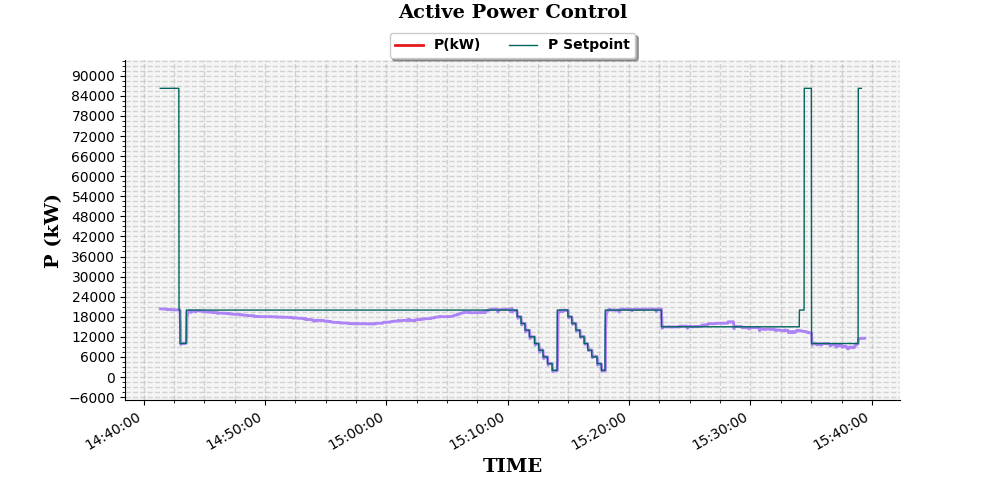

In [57]:
%matplotlib notebook
fig,axes,lines,leg=plot_P(time,m['P'].iloc[:,0],s['P'].iloc[:,0],en['P'].iloc[:,0])

In [1]:
%matplotlib notebook
from plot_maplot_v1 import *
from recourses import *
import base64
import io
import tkinter as tk
from tkinter import colorchooser,filedialog,simpledialog,messagebox,ttk,PhotoImage
from PIL import Image, ImageTk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg,NavigationToolbar2Tk
from matplotlib.lines import Line2D
from matplotlib.text import Text
import matplotlib as mpl
import sys
import re
import numpy as np
import matplotlib.dates as mdates
from colorutils import Color

In [15]:
class NavigationToolbar(NavigationToolbar2Tk):
    # only display the buttons we need
    toolitems = [t for t in NavigationToolbar2Tk.toolitems if
                 t[0] in ('Pan', 'Zoom', 'Save')]

class HoverButton(tk.Button):
    def __init__(self, master, **kw):
        tk.Button.__init__(self,master=master,**kw)
        self.defaultBackground = self["background"]
        self.bind("<Enter>", self.on_enter)
        self.bind("<Leave>", self.on_leave)

    def on_enter(self, e):
        self['background'] = self['activebackground']

    def on_leave(self, e):
        self['background'] = self.defaultBackground
        
master = tk.Tk()
master.title("PLOT")
master.grid_columnconfigure(0, weight=1)
master.grid_rowconfigure(0, weight=1)

In [16]:
# master.protocol("WM_DELETE_WINDOW")
fig,ax = plt.subplots(1,1)
canvas_frame=tk.Frame(master)
canvas = FigureCanvasTkAgg(fig, canvas_frame)
canvas_frame.grid(row=0,columnspan=2,sticky=tk.NSEW)
canvas_frame.grid_rowconfigure(0,weight=1)
canvas_frame.grid_columnconfigure(0,weight=1)

frame = tk.Frame(master)
frame.grid(row=1,columnspan=2,sticky=tk.NSEW)
frame.grid_rowconfigure(0,weight=1)
frame.grid_columnconfigure(0,weight=1)

toolbar = NavigationToolbar(canvas, frame)
toolbar.update()

canvas.get_tk_widget().grid(row=0,sticky=tk.NSEW)

buttons_frame=tk.Frame(master)
buttons_frame.grid(row=2,columnspan=2,sticky=tk.NSEW)
buttons_frame.grid_columnconfigure(0,weight=1)
buttons_frame.grid_columnconfigure(1,weight=1)
buttons_frame.grid_rowconfigure(0,weight=1)
buttons_frame.grid_rowconfigure(1,weight=1)

resetbutton=HoverButton(buttons_frame, text="Reset Axes",activebackground='red',background = "white",borderwidth=2,relief="raised")
# resetbutton.config(command=reset)
resetbutton.grid(row=0,column=0,sticky=tk.NSEW)

savebutton=HoverButton(buttons_frame, text="Save Interactive",activebackground='red',background="white",borderwidth=2,relief="raised")
# savebutton.config(command=save)
savebutton.grid(row=0,column=1,sticky=tk.NSEW)

quitbutton=HoverButton(buttons_frame,text="Quit",activebackground='red')
# quitbutton.config(command=destroyer)
quitbutton.grid(row=1,column=0)

master.mainloop()

In [1]:
from tkinter import filedialog
from tkinter import *

root = Tk()
root.withdraw()
filename =  filedialog.asksaveasfilename(initialdir = "/",title = "Select file",filetypes = (("pickle files","*.pickle"),("all files","*.*")),parent=root)
# print (root.filename)

In [2]:
filename

'/home/skont/Downloads/aaaa.csv'

In [1]:
import matplotlib.pyplot as plt
import pickle
with open('test.pickle', 'rb') as file: 
    figx = pickle.load(file)

In [12]:
def plot_existing(figure):
    import random
    import string

    def randstring(n):
      alphabet = string.ascii_letters[0:6] + string.digits
      hexc = ''.join(random.choice(alphabet) for i in range(n))
      return '#'+hexc

    fig, ax = plt.subplots(figsize=(10,5))
    x = figure.axes[0].lines[0].get_data()[0]
    if isinstance(x[0],np.datetime64):
        x_new=[]
        for el in x:
            x_new.append(datetime.datetime.strptime(str(el).split("T")[1].split(".")[0],'%H:%M:%S'))
        x=x_new

    num_a=0
    lines=[]
    i=1
    j=1
    if len(figure.axes)>1:
        ax2=ax.twinx()

    for a in figure.axes:
        for l in a.lines:
            y = l.get_data()[1]
            if num_a==0:
                line,=ax.plot(x,y,label="Y1,"+str(i),color=randstring(6),linewidth=1)
                i+=1
            else:
                line,=ax2.plot(x,y,label="Y2,"+str(j),color=randstring(6),linewidth=1)
                j+=1
            l.set_picker(5)
            l.set_alpha(1)
            lines.append(line)

        num_a+=1

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set_facecolor('#000000')
    ax.grid(which='major',ls='--',lw=0.5,c='#b0b0b0',alpha=0.5)
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    if isinstance(x[0],pd._libs.tslibs.timestamps.Timestamp):
        ax.xaxis.set_major_locator(mdates.AutoDateLocator(interval_multiples=True))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
    else:
        ax.xaxis.set_major_locator(MaxNLocator(nbins=20,integer=True))
        ax.xaxis.set_minor_locator(AutoMinorLocator())

    ax.yaxis.set_major_locator(MaxNLocator(nbins=20,integer=True))
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.set_xlabel(figure.axes[0].get_xlabel(),fontdict=font)
    ax.set_ylabel('Y1 label goes here',fontdict=font)
    ax.set_title('Title goes here',fontdict=font,x=0.5,y=1.1)

    labs = [l.get_label() for l in lines]
    leg = ax.legend(lines,labs,bbox_to_anchor=(0.5, 1.1),loc='upper center',ncol=len(lines),prop=legend_font,
                   fancybox=True, shadow=True)
    fig.autofmt_xdate()

    if j > 1:
        ax2.spines["top"].set_visible(False)
        ax2.yaxis.set_major_locator(MaxNLocator(nbins=20,integer=True))
        ax2.yaxis.set_minor_locator(AutoMinorLocator())
        ax2.set_ylabel('Y2 label goes here',fontdict=font)

    try:
        m = min([min(calc_minmax(l.get_data()[1])) for l in ax2.lines])
        M = max([max(calc_minmax(l.get_data()[1])) for l in ax2.lines])
        ax2.set_ylim(m,M)
    except:pass

    try:
        m = min([min(calc_minmax(l.get_data()[1])) for l in ax.lines])
        M = max([max(calc_minmax(l.get_data()[1])) for l in ax.lines])
        ax.set_ylim(m,M)
    except:pass

    return (fig,fig.axes,lines,leg)

<IPython.core.display.Javascript object>


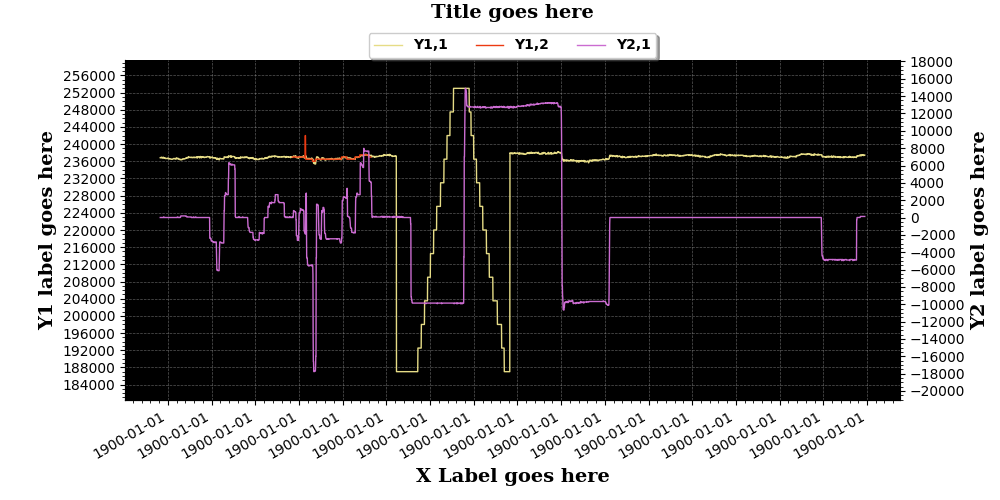

In [13]:
%matplotlib notebook
fig,axes,lines,leg=plot_existing(figx)

In [32]:
x=figx.axes[0].lines[0].get_data()[0]

In [39]:
x=figx.axes[0].lines[0].get_data()[0]
if isinstance(x[0],np.datetime64):
    x = [str(el).split("T")[1].split(".")[0] for el in x]
    time = pd.Series(x)
    time= time.apply(lambda y : datetime.datetime.strptime(str(y), '%H:%M:%S'))
    x=pd.Series(time)

In [9]:
x[0].strftime('%H:%M:%S')

'14:41:22'

In [34]:
time = pd.Series(x)

In [43]:
type(x[0])

pandas._libs.tslibs.timestamps.Timestamp

In [40]:
x

0      1900-01-01 14:41:22
1      1900-01-01 14:41:23
2      1900-01-01 14:41:24
3      1900-01-01 14:41:25
4      1900-01-01 14:41:26
               ...        
3479   1900-01-01 15:39:21
3480   1900-01-01 15:39:22
3481   1900-01-01 15:39:23
3482   1900-01-01 15:39:24
3483   1900-01-01 15:39:25
Length: 3484, dtype: datetime64[ns]

In [46]:
figx.axes[0].lines[0].get_label()

'V(V)'